# Chapter 1 - Classification and Regression Trees


### Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

### Train your first classification tree
In this exercise you'll work with the [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository. You'll predict whether a tumor is malignant(class 1) or benign(class 0) based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wbc = pd.read_csv('wbc.csv', index_col = 'id')
wbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
wbc['diagnosis'] = wbc['diagnosis'].map({'M' : 1, 'B' : 0})

In [4]:
wbc.drop('Unnamed: 32', axis = 1, inplace = True)

In [5]:
wbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X = wbc[['radius_mean', 'concave points_mean']].values

In [7]:
y = wbc['diagnosis'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

In [10]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth = 6, random_state = 1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


### Evaluate the classification tree
Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

In [11]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


### Using entropy as a criterion
In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

In [12]:
X = wbc.drop('diagnosis', axis = 1).values
y = wbc['diagnosis'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth = 8, criterion = 'entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### Using gini as a criterion

In [15]:
# Instantiate dt_entropy, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth = 8, criterion = 'gini', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### Entropy vs Gini index
In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy dt_gini.

In [16]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Evaluate accuracy_gini
accuracy_gini = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9473684210526315
Accuracy achieved by using the gini index:  0.9473684210526315


### Train your first regression tree
In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

In [17]:
auto = pd.read_csv('auto.csv')
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [18]:
auto = pd.get_dummies(auto)

In [19]:
auto.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [20]:
X = auto.drop('mpg', axis = 1).values

In [21]:
y = auto['mpg'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [23]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth = 8,
             min_samples_leaf = 0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

### Evaluate the regression tree
In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

In [24]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = np.sqrt(mse_dt)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.27


### Linear regression vs regression tree
In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

### Evaluate the linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse_lr = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_lr = np.sqrt(mse_lr)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_lr))

Test set RMSE of dt: 3.98


---

# Chapter 2 - The Bias-Variance Tradeoff

### The bias-variance tradeoff is one of the fundamental concepts in supervised machine learning. In this chapter, you'll understand how to diagnose the problems of overfitting and underfitting. You'll also be introduced to the concept of ensembling where the predictions of several models are aggregated to produce predictions that are more robust.


### Instantiate the model
In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

In [26]:
# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 0.26, random_state=SEED)

### Evaluate the 10-fold CV error
In this exercise, you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree dt that you instantiated in the previous exercise.  

Note that since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs.

In [27]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv = 10, 
                       scoring = 'neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(0.5)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


### Evaluate the training error
You'll now evaluate the training set RMSE achieved by the regression tree dt that you instantiated in a previous exercise.

In [28]:
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(0.5)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


### Define the ensemble
In the following set of exercises, you'll work with the [Indian Liver Patient Dataset](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset) from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

In [29]:
indian_liver_patient = pd.read_csv('indian_liver_patient_preprocessed.csv', index_col = 'Unnamed: 0')
indian_liver_patient.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [30]:
X = indian_liver_patient.drop('Liver_disease', axis = 1).values
y = indian_liver_patient['Liver_disease'].values

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [33]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors = 27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf = 0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

### Evaluate individual classifiers
In this exercise you'll evaluate the performance of the models in the list classifiers that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.764
K Nearest Neighbours : 0.701
Classification Tree : 0.730


### Better performance with a Voting Classifier
Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

In [36]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators = classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.770


---

# Chapter 3 - Bagging and Random Forests

### Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

### Define the bagging classifier
In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier. 

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [38]:
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator = dt, n_estimators = 50, random_state=1)

### Evaluate DecisionTree performance

In [39]:
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of dt: {:.2f}'.format(acc_test)) 

Test set accuracy of dt: 0.64


### Evaluate Bagging performance
Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

In [40]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.71


### Out Of Bag Evaluation (OOB)
Recall that in bagging, some instances may be sampled several times for one model. On the other hand, other instances may not be sampled at all.  
On average, for each  model, 63% of the training instances are sampled. The remaining 37% that are not sampled constitute what is known as the Out Of Bag or OOB instances.  
Since OOB instances are not seen by a model during training, these can be used to estimate the performance of the ensemble without the need for cross validation. This technique is known as OOB-evaluation.  
The OOB-score of the bagging ensemble is evaluated as the average of the N OOB scores of N classifiers trained during Bagging

### Prepare the ground
In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In [41]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf = 8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator = dt, 
            n_estimators = 50,
            oob_score = True,
            random_state=1)

### OOB Score vs Test Set Score
Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

In [42]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.724, OOB accuracy: 0.687


### Random Forests (RF)
Recall that in Bagging the base estimator could be any model including a decision tree, a logistic regression or even a neural network. Each estimator is trained on a distinct bootstrap sample drawn from the training set using all available features.  

Random Forests is an ensemble method that uses a decision tree as a base estimator. 
In Random Forests each estimator is trained on a different bootstrap sample having the same size as the training set.  
Random Forests introduces further randomization than bagging when training each of the base estimators.  
When each tree is trained, only `d` features can be sampled at each node without replacement, where `d` is a number smaller than totla no. of. features. The node is then split using the sampled feature that maximizes information gain.  
In `scikit-learn` `d` defaults to the square-root of the number of features.  
Once trained, predictions can be made on new instances. When a new instance is fed to the different base estimators, each of them outputs a prediction.  
The predictions are then collected by the Random Forests meta-model and the final prediction is made depending on nature of the problem.  

Classification:

- Aggregates predictions by majority voting
- RandomForestClassifier in scikit-learn  

Regression:

- Aggregates predictions through averaging
- RandomForestRegressor in scikit-learn  

In generl, Random Forests achieves a lower variance than individual trees. 

### Train an RF regressor
In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the [Bike Sharing Demand dataset](https://www.kaggle.com/c/bike-sharing-demand) available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

In [43]:
bike = pd.read_csv('bikes.csv')
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [44]:
X = bike.drop('cnt', axis = 1).values
y = bike['cnt'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [46]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators = 25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

### Evaluate the RF regressor
You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

In [47]:
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** (0.5)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


### Visualizing features importances
In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values.

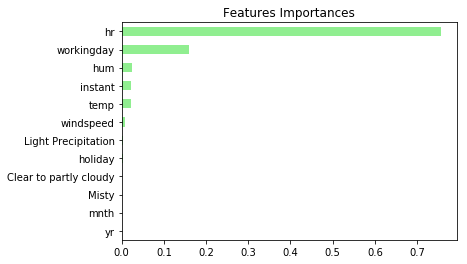

In [48]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= bike.drop('cnt', axis = 1).columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind = 'barh', color = 'lightgreen')
plt.title('Features Importances')
plt.show()

#### Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!

---

# Chapter 4 - Boosting


### Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors. In this chapter, you'll be introduced to the two boosting methods of AdaBoost and Gradient Boosting.

More formally, in boosting many weak learners are combined to form a strong learner.  
A weak learner is a model doing slightly better than random guessing. For example a decision tree with a maximum-depth of one, known as a `decision-stump`, is a weak learner.   

In Boosting an ensemble of predictors are trained sequentially and each predictor tries to correct the errors made by its predecessor.  

__Adaboost__  
- stands for __Ada__ptive __Boost__ing.
- Each predictor pays more attention to the instances wrongly predicted by its predecessor by constantly changing the weights of training instances.
- Each predictor is assigned a coefficient α (alpha) that weighs its contribution in the ensemble's prediction.
- α depends on the predictor's training error.  

__AdaBoost: Prediction__  

__Classification:__

- Weighted majority voting.
- In sklearn: AdaBoostClassifier.  

__Regression:__

- Weighted average.
- In sklearn: AdaBoostRegressor.

### Define the AdaBoost classifier
In the following exercises you'll revisit the Indian Liver Patient dataset which was introduced in a previous chapter. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, you'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

As a first step, you'll start by instantiating an AdaBoost classifier.

In [49]:
X = indian_liver_patient.drop('Liver_disease', axis = 1).values
y = indian_liver_patient['Liver_disease'].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [51]:
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth = 2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = 180, random_state=1)

### Train the AdaBoost classifier
Now that you've instantiated the AdaBoost classifier ada, it's time train it. You will also predict the probabilities of obtaining the positive class in the test set. This can be done as follows:

Once the classifier ada is trained, call the `.predict_proba()` method by passing X_test as a parameter and extract these probabilities by slicing all the values in the second column as follows:

```python
ada.predict_proba(X_test)[:,1]
``` 

In [52]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:, 1]

### Evaluate the AdaBoost classifier
Now that you're done training ada and predicting the probabilities of obtaining the positive class in the test set, it's time to evaluate ada's ROC AUC score. Recall that the ROC AUC score of a binary classifier can be determined using the roc_auc_score() function from sklearn.metrics.

In [53]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.64


### Gradient Boosting (GB)  

Gradient Boosting has a proven track record of winning many machine learning competitions.  
In Gradient Boosting each predictor in the ensemble corrects it's predecessor's error.  
In contrast to AdaBoost, the weights of the training instances are not tweaked. Instead, each predictor is trained using the residual error of its predecessor as labels.  

__Gradient Boosted Trees: Prediction__  

__Regression:__

- y_{pred} = y_1 + ηr_1 + ... + ηr_Ny

- In sklearn: GradientBoostingRegressor.  

__Classification:__

- In sklearn: GradientBoostingClassifier.

### Define the GB regressor
You'll now revisit the Bike Sharing Demand dataset that was introduced in the previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a gradient boosting regressor.

As a first step, you'll start by instantiating a gradient boosting regressor which you will train in the next exercise.

In [54]:
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [55]:
X = bike.drop('cnt', axis = 1).values
y = bike['cnt'].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [57]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth = 4, 
            n_estimators = 200,
            random_state=2)

### Train the GB regressor
You'll now train the gradient boosting regressor gb that you instantiated in the previous exercise and predict test set labels.

In [58]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

### Evaluate the GB regressor
Now that the test set predictions are available, you can use them to evaluate the test set Root Mean Squared Error (RMSE) of gb.

In [59]:
# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test ** (0.5)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 43.132


## Gradient Boosting: Cons
- GB involves an exaustive search procedure.

- Each CART is trained to find the best split points and features.

- May lead to CARTs using the same split points and maybe the same features.

### Stochastic Gradient Boosting
- Each tree is trained on a random subset of rows of the training data.

- The sampled instances (40%-80% of the training set) are sampled without replacement.

- Features are sampled (without replacement) when choosing split points.

- Result: further ensemble diversity.

- Effect: adding further variance to the ensemble of trees.



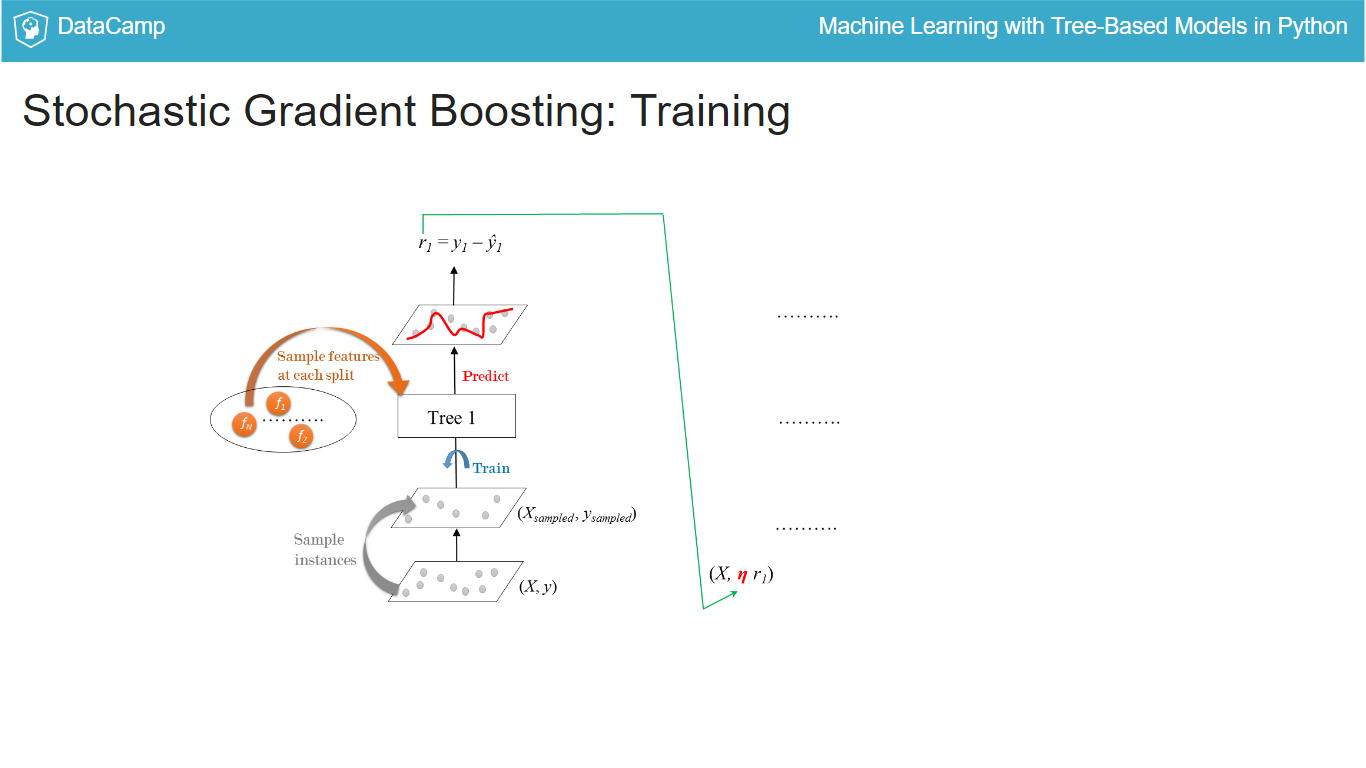

### Regression with SGB
As in the exercises from the previous lesson, you'll be working with the Bike Sharing Demand dataset. In the following set of exercises, you'll solve this bike count regression problem using stochastic gradient boosting

In [60]:
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [61]:
X = bike.drop('cnt', axis = 1).values
y = bike['cnt'].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [63]:
# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth = 4, subsample = 0.9,max_features = 0.75,
                                 n_estimators = 200,random_state=2)

### Train the SGB regressor
In this exercise, you'll train the SGBR sgbr instantiated in the previous exercise and predict the test set labels.

In [64]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

### Evaluate the SGB regressor
You have prepared the ground to determine the test set RMSE of sgbr which you shall evaluate in this exercise.

In [65]:
# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test ** (0.5)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 44.747


---

# Chapter 5 - Model Tuning

### The hyperparameters of a machine learning model are parameters that are not learned from data. They should be set prior to fitting the model to the training set. In this chapter, you'll learn how to tune the hyperparameters of a tree-based model using grid search cross validation.

### Hyperparameters
__Machine learning model:__

__parameters:__ learned from data

- CART example: split-point of a node, split-feature of a node, ...  

__hyperparameters:__ not learned from data, set prior to training

- CART example: max_depth, min_samples_leaf, splitting criterion ...


### What is hyperparameter tuning?
- __Problem:__ search for a set of optimal hyperparameters for a learning algorithm.

- __Solution:__ find a set of optimal hyperparameters that results in an optimal model.

- __Optimal model:__ yields an optimal score.

- __Score:__ in sklearn defaults to accuracy (classification) and R^2 (regression).

- Cross validation is used to estimate the generalization performance.  

### Why tune hyperparameters?
- In sklearn, a model's default hyperparameters are not optimal for all problems.

- Hyperparameters should be tuned to obtain the best model performance.  

### Approaches to hyperparameter tuning
- Grid Search

- Random Search

- Bayesian Optimization

- Genetic Algorithms

- ....

### Grid search cross validation
- Manually set a grid of discrete hyperparameter values.

- Set a metric for scoring model performance.

- Search exhaustively through the grid.

- For each set of hyperparameters, evaluate each model's CV score.

- The optimal hyperparameters are those of the model achieving the best CV score.  

### Grid search cross validation: example
- Hyperparameters grids: 
    - max_depth = {2,3,4},
    - min_samples_leaf = {0.05, 0.1}
- hyperparameter space = { (2,0.05) , (2,0.1) , (3,0.05), ... }
- CV scores = { score_{(2,0.05)} , ... }
- optimal hyperparameters = set of hyperparameters corresponding to the best CV score.

### Set the tree's hyperparameter grid
In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree dt and find the optimal classifier in the next exercise.

In [66]:
# Define params_dt
params_dt = {'max_depth' : [2, 3, 4], 'min_samples_leaf' : [0.12, 0.14, 0.16, 0.18]}

### Search for the optimal tree
In this exercise, you'll perform grid search using 5-fold cross validation to find dt's optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. You can train such an object similar to any scikit-learn estimator by using the .fit() method:

```python 
grid_object.fit(X_train, y_train)
``` 

In [72]:
X = indian_liver_patient.drop('Liver_disease', axis = 1).values
y = indian_liver_patient['Liver_disease'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator = dt,
                       param_grid = params_dt,
                       scoring = 'roc_auc',
                       cv = 5,
                       n_jobs=-1)

#### Evaluate the optimal tree
In this exercise, you'll evaluate the test set ROC AUC score of grid_dt's optimal model.

In [76]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [77]:
# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.731


### Random Forests Hyperparameters
- CART hyperparameters

- number of estimators

- bootstrap

- ....  

### Tuning is expensive
__Hyperparameter tuning:__

- computationally expensive,

- sometimes leads to very slight improvement,

In [78]:
X = bike.drop('cnt', axis = 1).values
y = bike['cnt'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Set the hyperparameter grid of RF
In this exercise, you'll manually set the grid of hyperparameters that will be used to tune rf's hyperparameters and find the optimal regressor. For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

In [79]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators' : [100, 350, 500], 'max_features' : ['log2', 'auto', 'sqrt'], 'min_samples_leaf' : [2, 10, 30]}

###  Search for the optimal forest
In this exercise, you'll perform grid search using 3-fold cross validation to find rf's optimal hyperparameters. To evaluate each model in the grid, you'll be using the negative mean squared error metric.

Note that because grid search is an exhaustive search process, it may take a lot time to train the model.

In [81]:
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf,
                       scoring = 'neg_mean_squared_error', cv = 3,
                       verbose=1, n_jobs=-1)

In [82]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   41.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 350, 500], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [84]:
# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred) ** (0.5)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 51.359


#### Magnificent work!